In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.dates import DateFormatter

In [2]:
df = pd.read_excel(r"E:\\mdata\\Roadaudit.xlsx",parse_dates=['Date'])
df.shape
df.dtypes
df.head()
df.columns
df['profit'] = df['CLIENT_FARE'] - df['DRIVER_FARE']

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\\\mdata\\\\Roadaudit.xlsx'

np.sum(df['CLIENT_FARE'])

In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

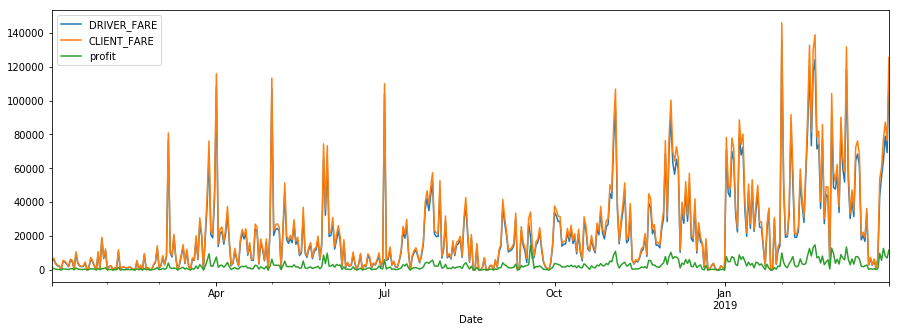

In [7]:
ts1 =df.groupby(pd.Grouper(key='Date', freq='1D')).sum()
ts1.plot(figsize=(15,5))

In [8]:
#%%  Monthwise - Driver, Client - Plot1
ts2=df.groupby(pd.Grouper(key='Date', freq='1M')).sum()
ts2.head()


,DRIVER_FARE,CLIENT_FARE,profit
Date,,,
2018-01-31,130597.7,144431.00,13833.30
2018-02-28,63941.2,71307.00,7365.80
2018-03-31,475439.0,525823.00,50384.00
2018-04-30,512813.1,565901.00,53087.90
2018-05-31,717990.0,799776.46,81786.46


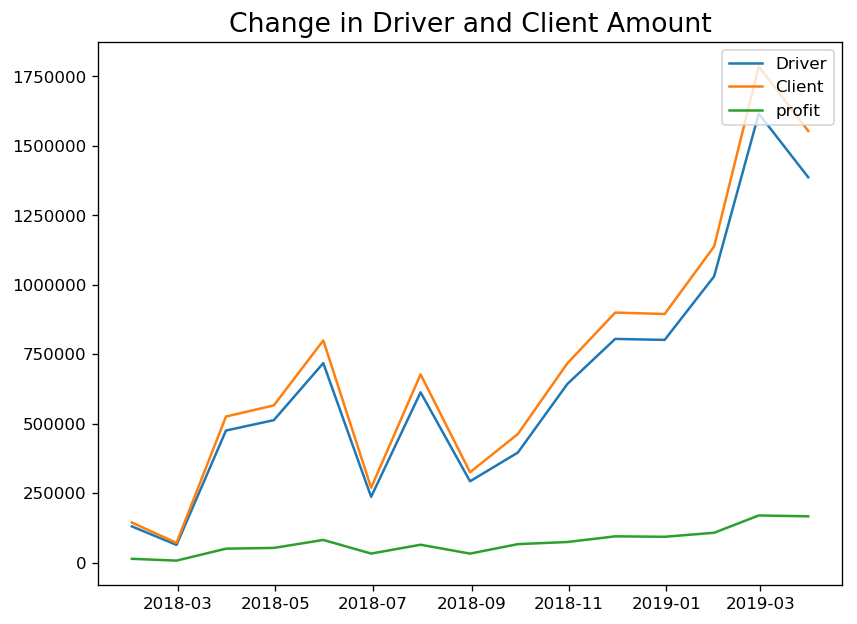

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi= 120)
plt.plot(ts2)
plt.legend(['Driver','Client','profit'],loc='upper right')
plt.title('Change in Driver and Client Amount', fontsize=16)
plt.show()

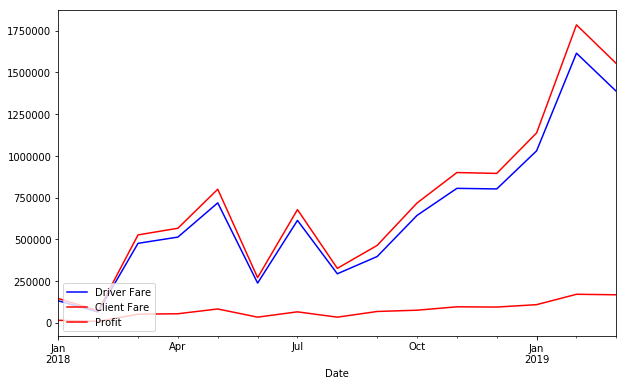

In [10]:
#%% Another Plot
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.xlabel('Month and Year')
#ax1 =ts1.DRIVER_FARE.plot(color='blue', type='point')
ax1 = ts2.DRIVER_FARE.plot(color='blue', label='Driver Fare')
ax2 = ts2.CLIENT_FARE.plot(color='red', label='Client Fare')
ax3 = ts2.profit.plot(color='red', label='Profit')
ax1.legend(loc=1)
ax2.legend(loc=2)
ax3.legend(loc=3)
plt.show()

In [11]:
df.head()
df1 = df.copy()
df1.set_index('Date', inplace=True) #create index as date

In [12]:
m1 = df1.resample('MS')['profit'].sum()
m1.head()

Date
2018-01-01    13833.30
2018-02-01     7365.80
2018-03-01    50384.00
2018-04-01    53087.90
2018-05-01    81786.46
Name: profit, dtype: float64

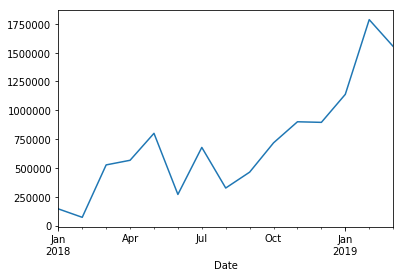

In [13]:
m1 = df1.resample('MS')['CLIENT_FARE'].sum()
m1.plot()

In [14]:
q1=df1.resample('QS')['CLIENT_FARE'].sum()

In [15]:
y1=df1.resample('YS')['CLIENT_FARE'].sum()

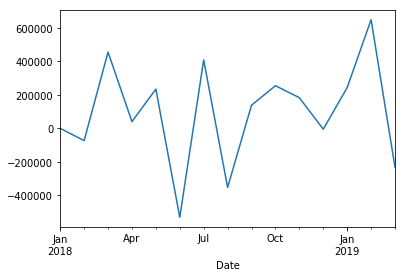

In [16]:
#now find the growth by taking diff
#monthly growth pattern
mg1 = m1.diff(periods=1)
mg1.fillna(0, inplace=True)
mg1.plot()

In [17]:
#Quarterly
qg1 = q1.diff(periods=1)
qg1.fillna(0, inplace=True)
qg1

Date
2018-01-01          0.00
2018-04-01     893779.46
2018-07-01    -169385.46
2018-10-01    1045925.00
2019-01-01    1964951.00
Name: CLIENT_FARE, dtype: float64

In [18]:
#yearly growth
yg1 = y1.diff(periods=1)
yg1.fillna(0, inplace=True)
yg1

Date
2018-01-01          0.00
2019-01-01   -1877905.46
Name: CLIENT_FARE, dtype: float64

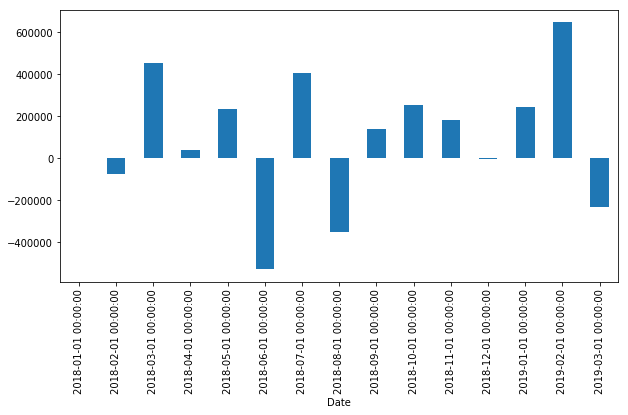

In [19]:
#different ways of making plots
mg1.plot(kind='bar')
mg1.plot.bar(x='Date', rot=90, figsize=(10,5))

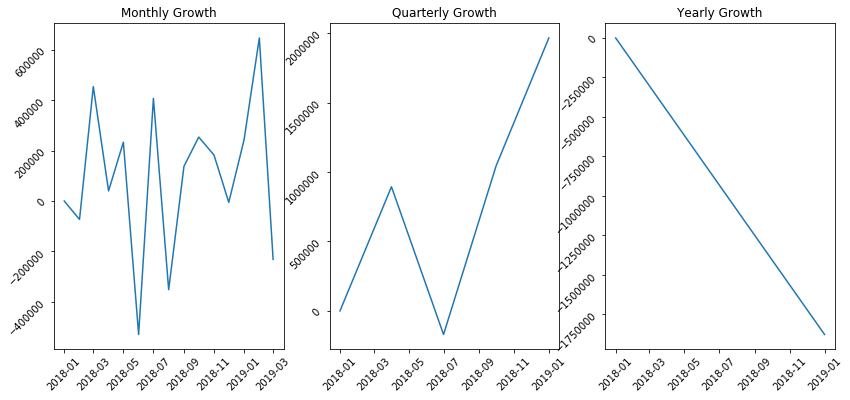

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

ax[0].tick_params(labelrotation=45)
ax[0].plot(mg1)
ax[0].set_title("Monthly Growth")

ax[1].tick_params(labelrotation=45)
ax[1].plot(qg1)
ax[1].set_title("Quarterly Growth")

ax[2].tick_params(labelrotation=45)
ax[2].plot(yg1)
ax[2].set_title("Yearly Growth");
plt.show();

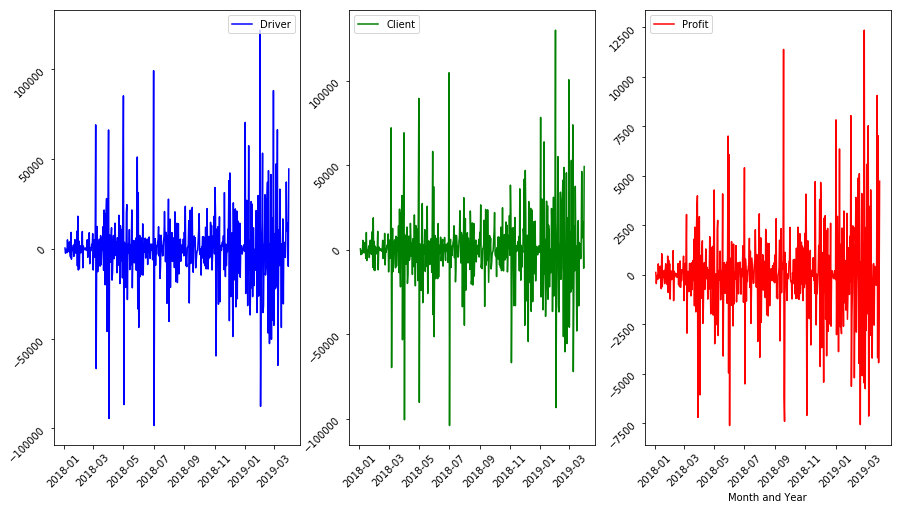

In [21]:
#%% Growth : Monthwise
ts2
ts2month = ts1.diff(periods=1, axis=0)
fig, ax = plt.subplots(1, 3, figsize=(15,8))
plt.xlabel('Month and Year')
ax[0].tick_params(labelrotation=45)
ax[0].plot(ts2month.DRIVER_FARE, color='blue',label='Driver')
ax[1].tick_params(labelrotation=45)
ax[1].plot(ts2month.CLIENT_FARE, color='green', label='Client')
ax[2].tick_params(labelrotation=45)
ax[2].plot(ts2month.profit, color='red', label='Profit')
ax[0].legend(loc=1)
ax[1].legend(loc=2)
ax[2].legend(loc=2)
plt.show()

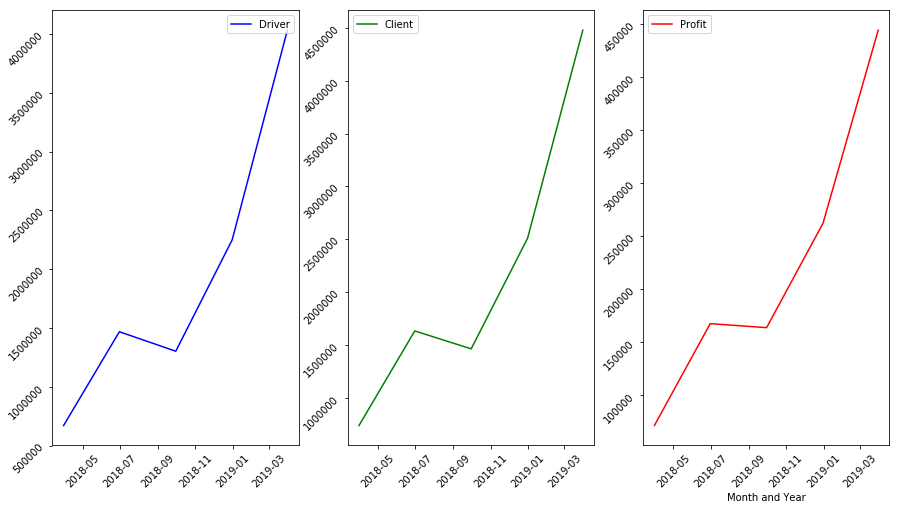

In [22]:
#%%: Quarterly Growth
ts2quarter=df.groupby(pd.Grouper(key='Date', freq='1Q')).sum()
ts2quarter.head()

fig, ax = plt.subplots(1, 3, figsize=(15,8))
plt.xlabel('Month and Year')
ax[0].tick_params(labelrotation=45)
ax[0].plot(ts2quarter.DRIVER_FARE, color='blue',label='Driver')
ax[1].tick_params(labelrotation=45)
ax[1].plot(ts2quarter.CLIENT_FARE, color='green', label='Client')
ax[2].tick_params(labelrotation=45)
ax[2].plot(ts2quarter.profit, color='red', label='Profit')
ax[0].legend(loc=1)
ax[1].legend(loc=2)
ax[2].legend(loc=2)
plt.show()

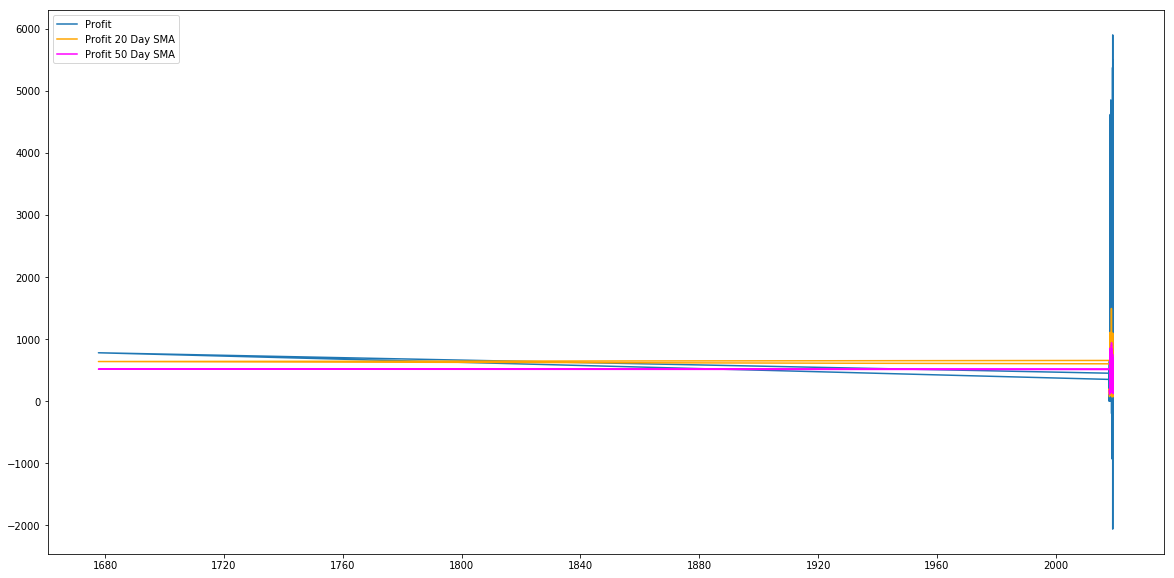

In [23]:
plt.figure(figsize=(20,10))
rolling_mean = df.profit.rolling(window=20).mean()
rolling_mean2 = df.profit.rolling(window=50).mean()
plt.plot(df.Date, df.profit, label='Profit')
plt.plot(df.Date, rolling_mean, label='Profit 20 Day SMA', color='orange')
plt.plot(df.Date, rolling_mean2, label='Profit 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

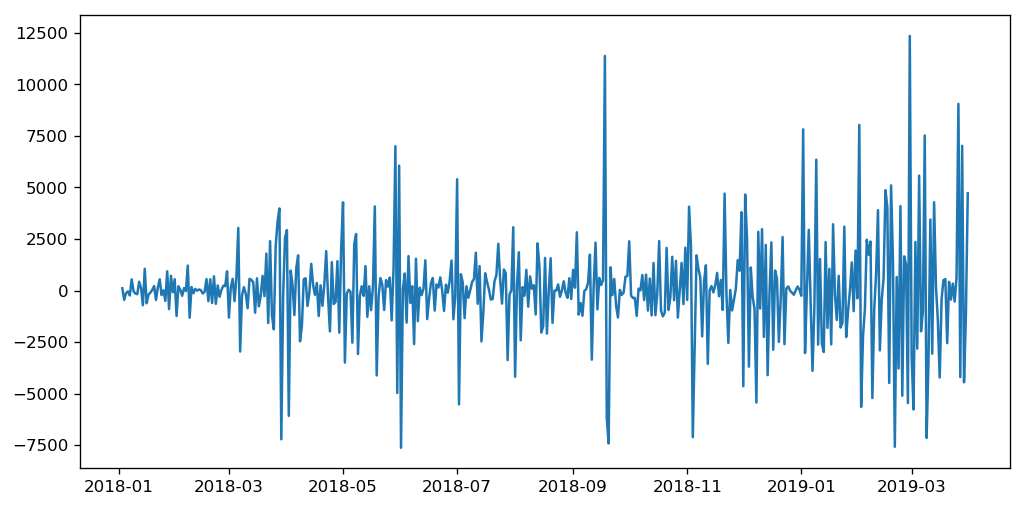

In [131]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
#df4 = df.groupby('Date')['profit'].sum()
df4 = df1.resample('D')['profit'].sum()
df4.head()
plt.figure(figsize=(10,5))
plt.plot(df4.diff())
plt.set_title('1st Differencing')
plt.show()

In [154]:
df4.head()

Date
2018-01-02    735.0
2018-01-03    848.0
2018-01-04    397.0
2018-01-05    273.0
2018-01-06    235.0
Name: profit, dtype: float64

In [185]:
df4 = df1.resample('MS')['profit'].sum()
df4.head()

Date
2018-01-01    13833.30
2018-02-01     7365.80
2018-03-01    50384.00
2018-04-01    53087.90
2018-05-01    81786.46
Name: profit, dtype: float64

In [24]:
#read thiss..
from statsmodels.tsa.arima_model import ARIMA
# 1,1,2 ARIMA Model
model = ARIMA(df4, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

NameError: name 'df4' is not defined

In [ ]:
# plot residual errors
from pandas import DataFrame
from matplotlib import pyplot
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
df4.head()

In [ ]:
X = df4.values
X

In [ ]:
train = X[:15]
test =  X[15:]

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(40, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc)
lower_series = pd.Series(conf[:, 0])
upper_series = pd.Series(conf[:, 1])

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})
forecast_accuracy(fc, test.values) ####Unable to find it

In [ ]:
### the changes i had done is that i had changed the df4 into months instead of date...